We evaluate both the rule-based classifier and the embedding-based classifier.

In [4]:
from context import speechact
import speechact.classifier.embedding as emb
import speechact.classifier.base as b
import speechact.evaluation as evaluation
import speechact.corpus as corp
import speechact.annotate as anno
import speechact.classifier.rulebased as rule
import matplotlib.pyplot as plt


labels = [act.value for act in emb.SPEECH_ACTS]

# Load test data.
test_corpus = corp.Corpus('../data/annotated data/test-set-upsampled.conllu.bz2')

results = {}

# Evaluate the Rule-based Classifier

Number of rules: 143
Accuracy: 0.6844477836213373
Classification report:
              precision    recall  f1-score   support

   assertion       0.52      0.77      0.62      1331
    question       0.96      0.92      0.94      1331
   directive       0.72      0.60      0.66      1331
  expressive       0.67      0.44      0.53      1331

   micro avg       0.69      0.68      0.69      5324
   macro avg       0.72      0.68      0.69      5324
weighted avg       0.72      0.68      0.69      5324

Confusion matrix:
            assertion  question  directive  expressive
assertion        1031         8        104         177
question           54      1226         34          17
directive         389        33        803          90
expressive        526        15        170         584


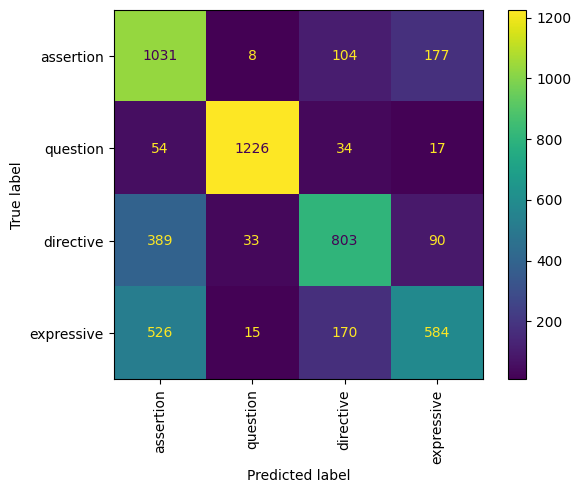

In [5]:
rules_file = '../models/trainable_rule_classifier_sentiment_large.json'

rb_classifier = rule.TrainableSentimentClassifierV2(ruleset_file=rules_file)
print(f'Number of rules: {rb_classifier.rule_count}')

results['rule-based'] = evaluation.evaluate(
    test_corpus, rb_classifier, labels, draw_conf_matrix=True)

# Evaluate the Embedding-based Classifier

Loading model from "../models/neural/no-hidden/liu-projdator-model.pth"
Accuracy: 0.7370398196844478
Classification report:
              precision    recall  f1-score   support

   assertion       0.60      0.70      0.64      1331
    question       0.94      0.93      0.93      1331
   directive       0.72      0.75      0.73      1331
  expressive       0.72      0.57      0.63      1331

    accuracy                           0.74      5324
   macro avg       0.74      0.74      0.74      5324
weighted avg       0.74      0.74      0.74      5324

Confusion matrix:
            assertion  question  directive  expressive
assertion         934        23        183         191
question           40      1234         37          20
directive         219        30       1002          80
expressive        375        28        174         754


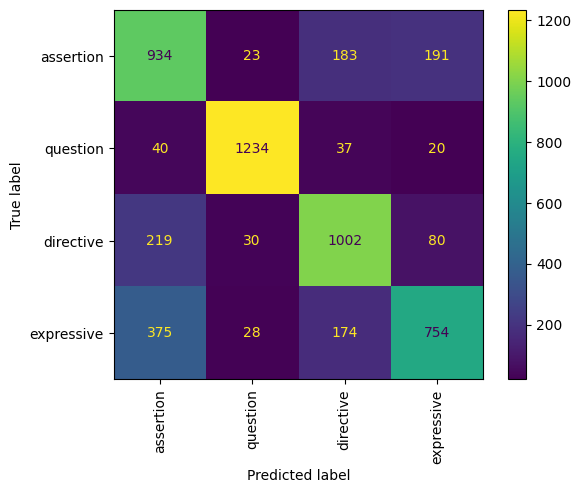

In [8]:
emb_file = '../models/neural/no-hidden/liu-projdator-model.pth'

emb_classifier = emb.EmbeddingClassifier()
emb_classifier.load(emb_file)

results['embedding-based'] = evaluation.evaluate(
    test_corpus, emb_classifier, labels, draw_conf_matrix=True)

# Comparison

In [9]:
def plot_bar_graph_01(labels, y_values, title):
    plt.figure(facecolor='white')
    plt.title(title)
    plt.ylim(0, 1)
    plt.yticks([0, 0.25, 0.5, 0.75, 1])
    plt.grid(True, which='major', axis='y')
    plt.bar(x = labels, height = y_values)
    plt.xticks(rotation=90)
    plt.show()

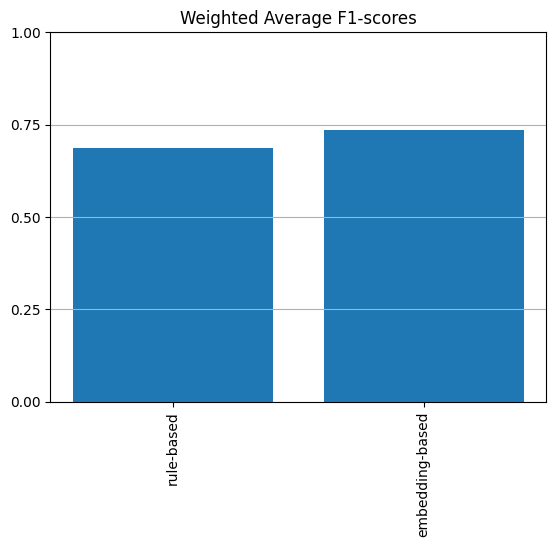

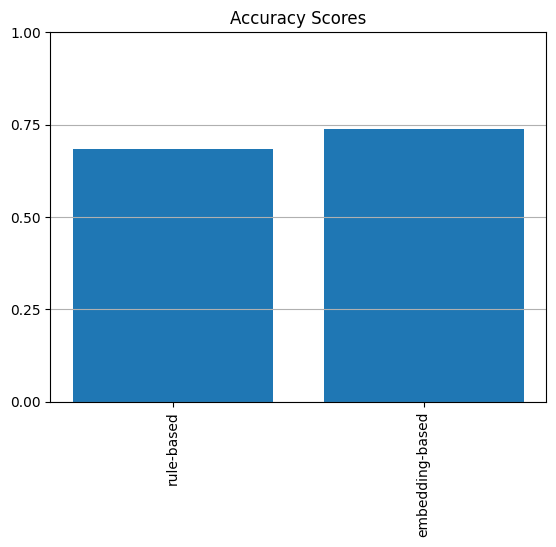

In [10]:
classifiers = list(results.keys())
f1_scores = [results[clsf]['classification_report']['weighted avg']['f1-score'] for clsf in classifiers]
accuracies = [results[clsf]['accuracy'] for clsf in classifiers]

plot_bar_graph_01(classifiers, f1_scores, 'Weighted Average F1-scores')
plot_bar_graph_01(classifiers, accuracies, 'Accuracy Scores')
